<center><img src="http://milestonetechs.com/media/filer_public_thumbnails/filer_public/24/26/24260fc4-2637-4348-b2bd-3c333f2f806d/python_logo.jpg__800x250_q85_crop_subsampling-2.jpg" width="1000"></center>

# Programa de Especialización en Python

## Tema 5. Entendimiento de datos

### Prof. Manuel Sigüeñas, M.Sc.(c)

<a id='beginning'></a>

En esta sección veremos una breve introducción a conceptos básicos y una primera aproximación a los datos a través del análisis exploratorio:

1. [Variables e indicadores](#part1) 
2. [Tipos de datos](#part2)
3. [Análisis exploratorio de datos (AED)](#part3)

In [ ]:
from IPython.display import Image
%matplotlib inline

<a id='part1'></a>
## Variables e indicadores

[Ir a inicio](#beginning)
____
* Operacionalización: procesos de conceptos abstractos a fenómenos observables. Es importante la operacionalización, porque lo que utilizamos en la investigación no son conceptos , sino indicadores.
* Instrumentación: paso para formular observaciones.
* Medición: La asignación de valores que representan propiedades. El resultado de esta es que tenemos un valor que podemos asociar con alguna variable en un caso dado .
* Variable: Son características o propiedades del fenómeno que se investiga cuya variación, a lo largo del tiempo y del espacio, son susceptibles de medirse y observarse. 
* Indicadores: Constituyen los elementos más concretos de una variable y son los que permiten observarlas y medirlas.


<a id='part2'></a>
## Tipos de datos

[Ir a inicio](#beginning)
____

<a id='part3'></a>
## Análisis exploratorio de datos (AED)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
os.getcwd()

NameError: name 'os' is not defined

In [13]:
FileCSV="D:/Python/1. Nivel I/5/MarketingDirecto.csv"
mark=pd.read_csv(FileCSV,  sep=',')
mark.head()

,Edad,Genero,Vivienda,Ecivil,Ubicacion,Salario,Hijos,Historial,Catalogos,Monto
0,Adulta,Femenino,Propia,Soltero,Lejos,47500,0,Alto,6,755
1,Media,Masculino,Alquilada,Soltero,Cerca,63600,0,Alto,6,1318
2,Joven,Femenino,Alquilada,Soltero,Cerca,13500,0,Bajo,18,296
3,Media,Masculino,Propia,Casado,Cerca,85600,1,Alto,18,2436
4,Media,Femenino,Propia,Soltero,Cerca,68400,0,Alto,12,1304


In [14]:
# Controlando valores nulos
mark.isnull().any().any()

True

In [15]:
#porcentaje de valores null por columna
(mark.isnull().sum() / len(mark))*100

Edad          0.0
Genero        0.0
Vivienda      0.0
Ecivil        0.0
Ubicacion     0.0
Salario       0.0
Hijos         0.0
Historial    30.3
Catalogos     0.0
Monto         0.0
dtype: float64

In [16]:
#número de casos
len(mark)

1000

In [17]:
# Agrupando columnas por tipo de datos
tipos = mark.columns.to_series().groupby(mark.dtypes).groups

In [18]:
# Armando lista de columnas categóricas
ctext = tipos[np.dtype('object')]
len(ctext)  # cantidad de columnas con datos categóricos. 

6

In [19]:
# Armando lista de columnas numéricas
columnas = mark.columns  # lista de todas las columnas
cnum = list(set(columnas) - set(ctext))
len(cnum)

4

In [20]:
#Bucle
# Completando valores faltantas datos cuantititavos
for c in cnum:
    mean = mark[c].mean()
    mark[c] = mark[c].fillna(mean)

In [21]:
#Bucle
# Completando valores faltantas datos categóricos
for c in ctext:
    mode = mark[c].mode()[0]
    mark[c] = mark[c].fillna(mode)

In [22]:
#Controlando que no hayan valores faltantes
mark.isnull().any().any()

False

In [23]:
# Guardando el dataset preprocesado
# Save transform datasets
mark.to_csv("D:/Python/1. Nivel I/5/mark_procesado.csv", index=False)

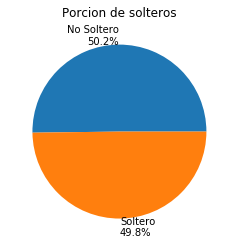

In [28]:
# Grafico de totas del porcentaje de donantes
# Agrupando por DONOR_FLAG
civil = mark.groupby('Ecivil').Ecivil.count() 
# Creando las leyendas del grafico.
labels = [ 'Soltero\n' + str(round(x * 1.0 / civil.sum() * 
                            100.0, 2)) + '%'  for x in civil ]
labels[0] = 'No ' + labels[0]

plt.pie(civil, labels=labels)
plt.title('Porcion de solteros')
plt.show()

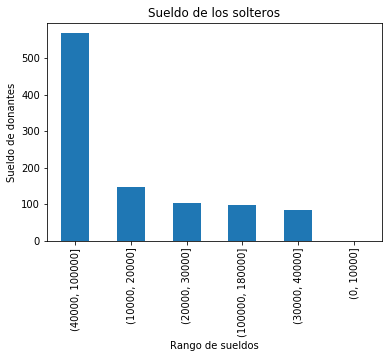

In [39]:
# Analizando el sueldo de los solteros
# Creando un segmentos de importes
imp_segm = pd.cut(mark['Salario'], 
                  [0, 10000,  20000, 30000, 40000, 100000, 180000])
# Creando el grafico de barras desde pandas
plot = pd.value_counts(imp_segm).plot(kind='bar',
                                      title='Sueldo de los solteros')
plot.set_ylabel('Sueldo de donantes')
plot.set_xlabel('Rango de sueldos')
plt.show()

In [40]:
# Agrupación por segmento segun sueldo.
pd.value_counts(imp_segm)

(40000, 100000]     568
(10000, 20000]      148
(20000, 30000]      102
(100000, 180000]     97
(30000, 40000]       85
(0, 10000]            0
Name: Salario, dtype: int64

In [41]:
# importe de donación promedio
mark['Salario'].mean()

56103.9

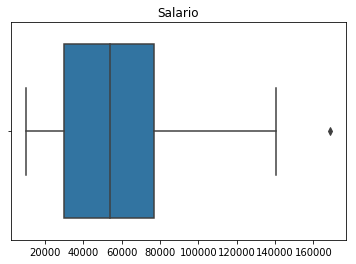

In [42]:
# Gráfico de cajas del importe de donación
sns.boxplot(list(mark['Salario']))
plt.title('Salario')
plt.show()

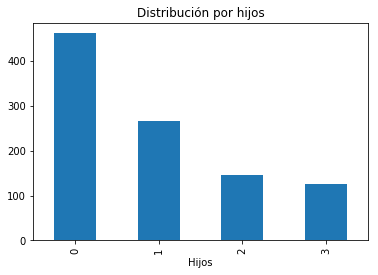

In [45]:
# Grafico del número de hijo
mark.groupby('Hijos').size().plot(kind='bar')
plt.title('Distribución por hijos')
plt.show()

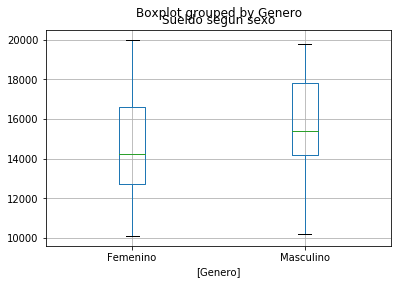

In [47]:
# sueldo segun el género
mark[(mark.Salario <= 20000)
             & (mark.Genero.isin(['Femenino', 'Masculino'])
               )][['Salario', 'Genero']].boxplot(by='Genero')
plt.title('Sueldo segun sexo')
plt.show()

In [49]:
# Media de sueldo por mujeres
mark[mark.Genero == 'Femenino'][['Salario']].mean()

Salario    48197.43083
dtype: float64

In [48]:
# Media de sueldo por hombres
mark[mark.Genero == 'Masculino'][['Salario']].mean()

Salario    64202.42915
dtype: float64

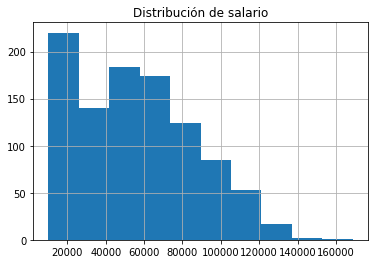

In [52]:
# Distribución de monto
mark['Salario'].hist().set_title('Distribución de salario')
plt.show()

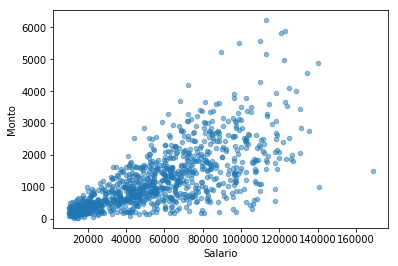

In [55]:
mark.plot.scatter(x="Salario", y='Monto', alpha = 0.5);

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


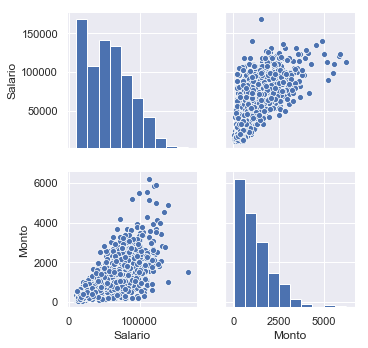

In [56]:
# Scatter plot:

sns.set()
cols = ['Salario', 'Monto']
sns.pairplot(mark[cols], size = 2.5)
plt.show();

[Ir a inicio](#beginning)
____

## Particionar un conjunto de datos en un conjunto de entrenamiento y prueba

In [3]:
import pandas as pd
import numpy as np
df_wine = pd.read_csv('https://archive.ics.uci.edu/'
                      'ml/machine-learning-databases/wine/wine.data',
                      header=None)

# si el conjunto de datos de Wine no está disponible temporalmente en
# repositorio de datos de Machine Learning de UCI, descomente la siguiente línea
# de código para cargar el conjunto de datos desde una ruta local:
# df_wine = pd.read_csv('wine.data', header=None)


df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
                   'Proline']

print('Class labels', np.unique(df_wine['Class label']))
df_wine.head()

Class labels [1 2 3]


,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [8]:
from sklearn.model_selection import train_test_split

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

X_train, X_test, y_train, y_test =\
    train_test_split(X, y, 
                     test_size=0.3, 
                     random_state=0, 
                     stratify=y)

In [11]:
X_train_df = pd.DataFrame(X_test)
X_train_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,13.77,1.90,2.68,17.1,115.0,3.00,2.79,0.39,1.68,6.30,1.13,2.93,1375.0
1,12.17,1.45,2.53,19.0,104.0,1.89,1.75,0.45,1.03,2.95,1.45,2.23,355.0
2,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
3,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
4,12.37,1.07,2.10,18.5,88.0,3.52,3.75,0.24,1.95,4.50,1.04,2.77,660.0


[Ir a inicio](#beginning)
____